In [1]:
###       Uber Supply Demand Gap
###       By : Balakrishna Gadiyar
##        Purpose - This Solution document highlights the problem areas where uber is facing the supply demand gap

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy,pandas and matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the companies text file.

uber = pd.read_csv('Uber Request Data.csv',sep=",")

# Verify the uploaded Data frame
uber.head(25)



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [5]:
# Check the Records count.
uber.shape
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
# Date formats are not alligned, replacing / with -
uber['Request timestamp']=uber['Request timestamp'].str.replace("/","-",case=False)
uber['Drop timestamp']=uber['Drop timestamp'].str.replace("/","-",case=False)

# Revalidating the data frame after aligning datetime fields
uber.head(25)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11-7-2016 7:25


In [7]:
# Date time fields are not aligned. Converting them to date time fields
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])
uber.head(25)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [8]:
# Validating unique entities assuming request id as key field
uber['Request id'].nunique()

6745

In [9]:
# Creating new column based on trip start and trip end. Duration field is in minutes
uber['Duration']=(uber['Drop timestamp']-uber['Request timestamp']).astype('timedelta64[m]')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,39.0


In [10]:
# Pick the hour from request timestamp. 
uber['Requested Hour']=uber['Request timestamp'].dt.hour

# Creating function to generate slots based on requested hour.
# 0:00 - 6:00 - Early Morning - EM
# 6:00 - 10:00 - Morning - M
# 10:00 - 16:000 - DayTime - D
# 16:00- 21:00 - Evening - E
# 21:00 - 0:00 -  Late Evening or Night - N

def validate(df):
    if df['Requested Hour'] <= 6:
        return "EM"
    if df['Requested Hour'] <= 10:
        return "M"
    if df['Requested Hour'] <= 16:
        return "D"
    if df['Requested Hour'] <= 21:
        return "E"
    if df['Requested Hour'] <= 23:
        return "N"

# Applying the function to create new column - slots.  
uber['slot']=uber.apply(validate,axis=1)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Duration,Requested Hour,slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.0,11,D
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.0,17,E
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.0,9,M
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.0,21,E
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,M
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0,21,E
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0,6,EM
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0,5,EM
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0,17,E
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,39.0,6,EM


In [11]:
# Create new ride types column to ease analysis

def ridetype(df):
    if df['Pickup point'] =='Airport':
        return "Towards City"
    if df['Pickup point'] =='City':
        return "Towards Airport"

# Applying the function to create new column - slots.  
uber['Ride Type']=uber.apply(ridetype,axis=1)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Duration,Requested Hour,slot,Ride Type
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.0,11,D,Towards City
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.0,17,E,Towards City
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.0,9,M,Towards Airport
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.0,21,E,Towards City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,M,Towards Airport
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0,21,E,Towards City
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0,6,EM,Towards City
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0,5,EM,Towards City
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0,17,E,Towards Airport
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,39.0,6,EM,Towards Airport


In [12]:
#validating the data frame for null values to get insights
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Duration             3914
Requested Hour          0
slot                    0
Ride Type               0
dtype: int64

In [23]:
#slot wise request distribution 
uber_slot_count=uber.groupby('slot')['Request id'].count()
uber_slot_count

slot
D      981
E     2342
EM    1421
M     1503
N      498
Name: Request id, dtype: int64

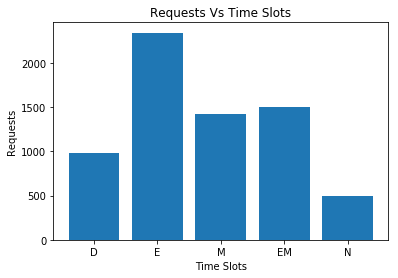

In [29]:
# Plot requests per timeslot using bar chart. 
plt.bar(uber.slot.unique(),uber_slot_count)

# put x and y labels, and the title
plt.xlabel("Time Slots")
plt.ylabel("Requests")
plt.title("Requests Vs Time Slots")

plt.show()

# We see that early morning (EM) and evening(E) have highest requests for cabs

In [15]:
#slot wise request distribution 
uber_slot_view=uber.groupby('Requested Hour')['Request id'].count()
uber_slot_view

Requested Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Request id, dtype: int64

In [ ]:
#Set Style for plot frame
sns.set_style("whitegrid")

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


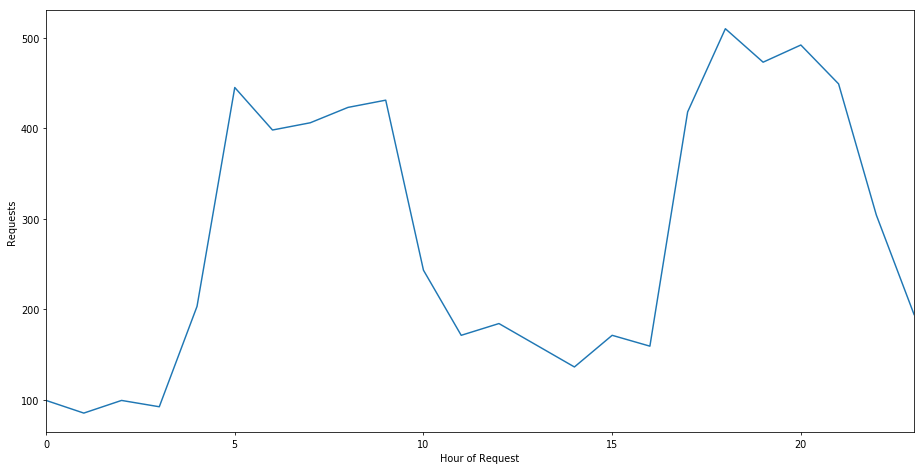

In [22]:
# time plot that depicts number of requests over each hour slots.
plt.figure(figsize=(16, 8),dpi=70)
# time series plot
sns.tsplot(uber_slot_view)
plt.xlabel("Hour of Request")
plt.ylabel("Requests")
plt.show()

#Current visualization shows exactly the peak points of requests

In [31]:
#distribution of requests based on ride type over 24 hour timeline
uber_ridetype_view=uber.groupby(['Requested Hour','Ride Type'])['Request id'].count()
uber_ridetype_view

Requested Hour  Ride Type      
0               Towards Airport     46
                Towards City        53
1               Towards Airport     43
                Towards City        42
2               Towards Airport     58
                Towards City        41
3               Towards Airport     47
                Towards City        45
4               Towards Airport    131
                Towards City        72
5               Towards Airport    353
                Towards City        92
6               Towards Airport    309
                Towards City        89
7               Towards Airport    323
                Towards City        83
8               Towards Airport    350
                Towards City        73
9               Towards Airport    342
                Towards City        89
10              Towards Airport    168
                Towards City        75
11              Towards Airport    107
                Towards City        64
12              Towards Airport 

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


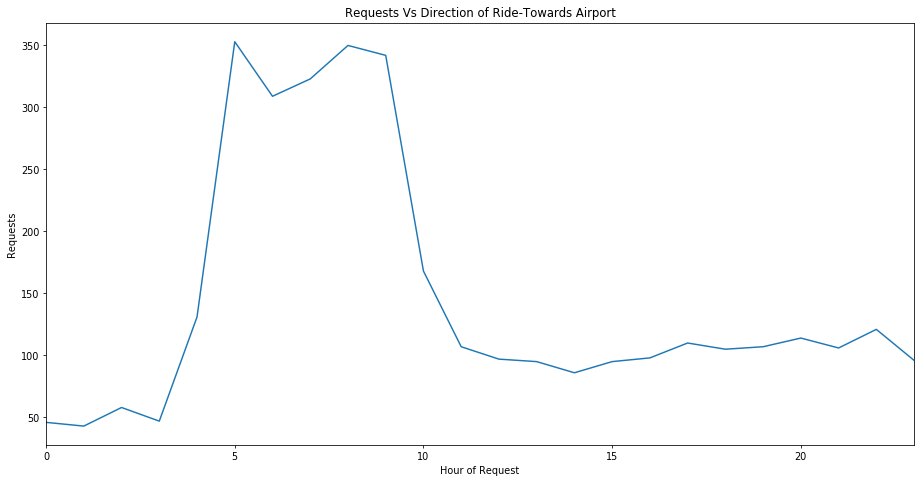

In [58]:
# time plot that depicts number of requests from people towards airport over each hour slots.
plt.figure(figsize=(16, 8),dpi=70)
# time series plot
sns.tsplot(uber[uber['Ride Type']=="Towards Airport"].groupby('Requested Hour')['Request id'].count())
plt.xlabel("Hour of Request")
plt.ylabel("Requests")
plt.title("Requests Vs Direction of Ride-Towards Airport")
plt.show()

#Current visualization shows exactly the peak points of requests, specifically people commuting towards airport

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


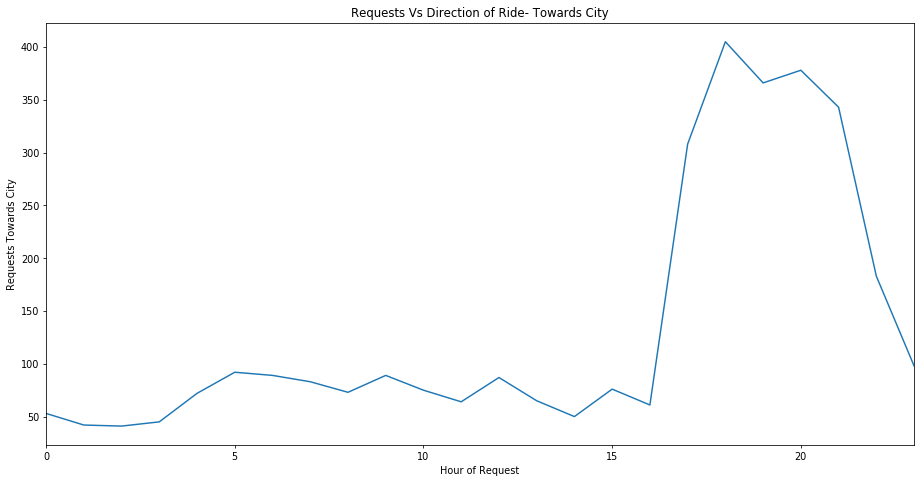

In [57]:
# time plot that depicts number of requests from people towards city over each hour slots.
plt.figure(figsize=(16, 8),dpi=70)
# time series plot
sns.tsplot(uber[uber['Ride Type']=="Towards City"].groupby('Requested Hour')['Request id'].count())
plt.xlabel("Hour of Request")
plt.ylabel("Requests Towards City")
plt.title("Requests Vs Direction of Ride- Towards City")
plt.show()

#Current visualization shows exactly the peak points of requests, specifically people commuting towards airport

In [84]:
#Number of requests that were not serviced by uber - specifically by users who wish to available cab to go to airport
uber_reject_nocab_airport=uber[(uber['Ride Type']=="Towards Airport") & (uber['Status']=="No Cars Available")].groupby('Requested Hour')['Request id'].count()
uber_reject_nocab_airport

Requested Hour
0     26
1     27
2     32
3     26
4     40
5     81
6     82
7     60
8     86
9     76
10    52
11    31
12    30
13    32
14    30
15    35
16    37
17    17
18    13
19    15
20    15
21    11
22    38
23    45
Name: Request id, dtype: int64

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


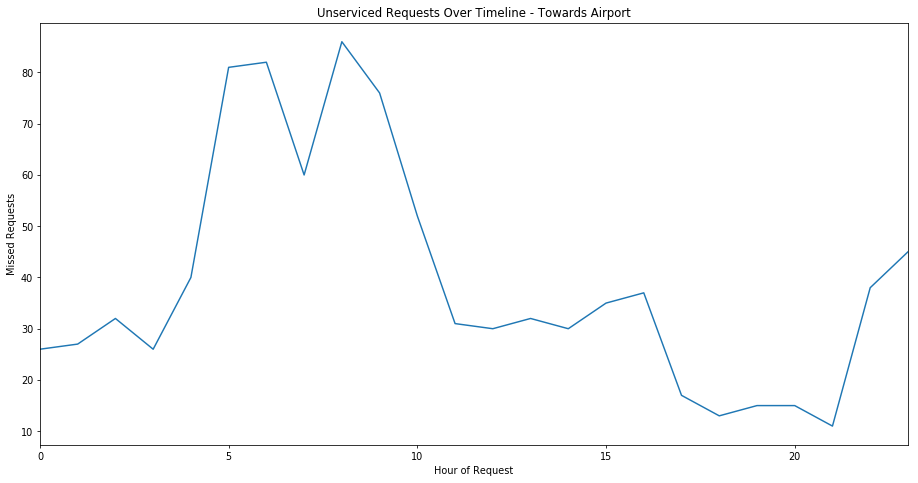

In [85]:
# time plot that depicts number of requests from people towards airport over each hour slots, that potentially missed the ride
plt.figure(figsize=(16, 8),dpi=70)
# time series plot
sns.tsplot(uber_reject_nocab_airport)
plt.xlabel("Hour of Request")
plt.ylabel("Missed Requests")
plt.title("Unserviced Requests Over Timeline - Towards Airport")
plt.show()

#Current visualization shows exactly the peak points of requests, specifically people commuting towards airport missing the ride, clearly highlight the loss for uber

In [82]:
#Number of requests that were not serviced by uber - specifically by users who wish to available cab to go towards
uber_reject_nocab_city=uber[(uber['Ride Type']=="Towards City") & (uber['Status']=="No Cars Available")].groupby('Requested Hour')['Request id'].count()
uber_reject_nocab_city

Requested Hour
0      30
1      29
2      25
3      30
4      34
5       3
6       4
7       3
8       4
9       7
10     13
11     10
12     14
13     21
14      7
15     13
16      9
17    215
18    309
19    268
20    275
21    254
22    100
23     36
Name: Request id, dtype: int64

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


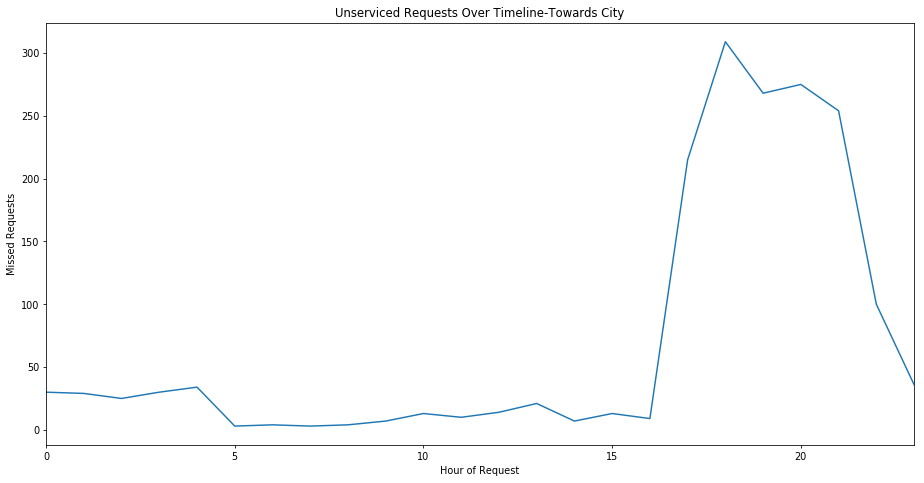

In [83]:
# time plot that depicts number of requests from people towards city over each hour slots, that potentially missed the ride
plt.figure(figsize=(16, 8),dpi=70)
# time series plot
sns.tsplot(uber_reject_nocab_city)
plt.xlabel("Hour of Request")
plt.ylabel("Missed Requests")
plt.title('Unserviced Requests Over Timeline-Towards City')
plt.show()

#Current visualization shows exactly the peak points of requests, specifically people commuting towards city missing the ride, clearly highlight the loss for uber

In [80]:
#Number of requests that were successfully completed over timeslots, Towards City
uber_success_city=uber[(uber['Ride Type']=="Towards City") & (uber['Status']=="Trip Completed")].groupby('Requested Hour')['Request id'].count()
uber_success_city

Requested Hour
0     23
1     13
2     16
3     15
4     36
5     85
6     81
7     75
8     67
9     74
10    53
11    49
12    63
13    35
14    37
15    52
16    38
17    74
18    81
19    83
20    74
21    61
22    80
23    62
Name: Request id, dtype: int64

In [120]:
#Number of requests that were successfully completed over timeslots, Towards Airport
uber_success_airport=uber[(uber['Ride Type']=="Towards Airport") & (uber['Status']=="Trip Completed")].groupby('Requested Hour')['Request id'].count()
uber_success_airport

Requested Hour
0      17
1      12
2      21
3      19
4      42
5     100
6      86
7      99
8      88
9      99
10     63
11     66
12     58
13     54
14     51
15     50
16     53
17     77
18     83
19     83
20     87
21     81
22     74
23     41
Name: Request id, dtype: int64

In [126]:
#Now analyzing differnt options available for trip status and see if further insights can be taken
uber_status=uber.groupby('Status')['Request id'].count()
uber_status

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Request id, dtype: int64

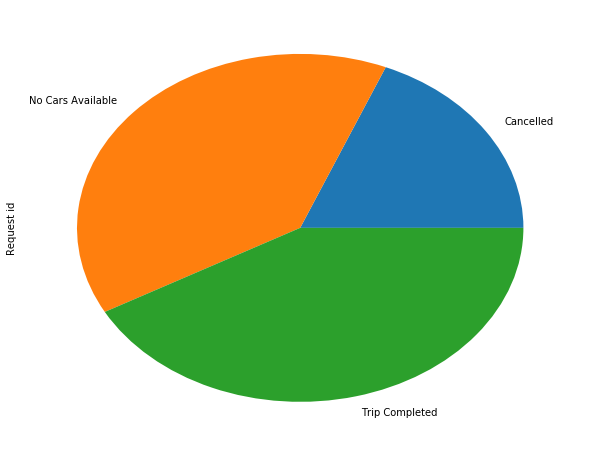

In [128]:
fig, ax=plt.subplots(figsize=(10,8))
uber_status.plot(kind='pie', ax=ax)
plt.show()
#We see that there are 1264 requests that are in cancelled state. These were not considered earlier assuming users cancelled it 


In [86]:
#If drivers persuade customers to cancel the requests, we need to consider it under rejected or no cabs available section. 
# Hence reploting the graphs including them.
statustypes=['No Cars Available', 'Cancelled']
uber_rejects_TowardAirport=uber[(uber['Ride Type']=="Towards Airport") & (uber.Status.isin(statustypes))].groupby('Requested Hour')['Request id'].count()
uber_rejects_TowardCity=uber[(uber['Ride Type']=="Towards City") & (uber.Status.isin(statustypes))].groupby('Requested Hour')['Request id'].count()

uber_rejects_TowardAirport

Requested Hour
0      29
1      31
2      37
3      28
4      89
5     253
6     223
7     224
8     262
9     243
10    105
11     41
12     39
13     41
14     35
15     45
16     45
17     33
18     22
19     24
20     27
21     25
22     47
23     55
Name: Request id, dtype: int64

In [87]:
uber_rejects_TowardCity

Requested Hour
0      30
1      29
2      25
3      30
4      36
5       7
6       8
7       8
8       6
9      15
10     22
11     15
12     24
13     30
14     13
15     24
16     23
17    234
18    324
19    283
20    304
21    282
22    103
23     36
Name: Request id, dtype: int64

C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


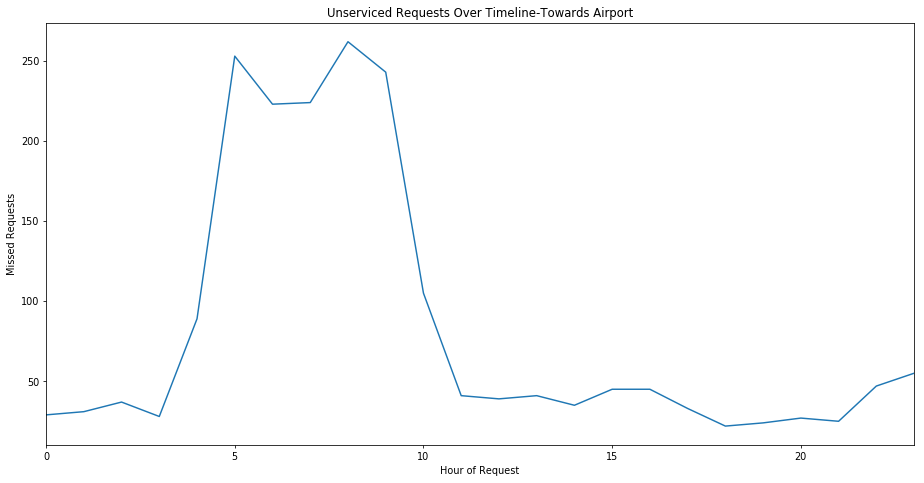

In [131]:
# time series plot based on above assumptions- rejects towards airport

plt.figure(figsize=(16, 8),dpi=70)
sns.tsplot(uber_rejects_TowardAirport)
plt.xlabel("Hour of Request")
plt.ylabel("Missed Requests")
plt.title('Unserviced Requests Over Timeline-Towards Airport')
plt.show()


C:\Technical\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


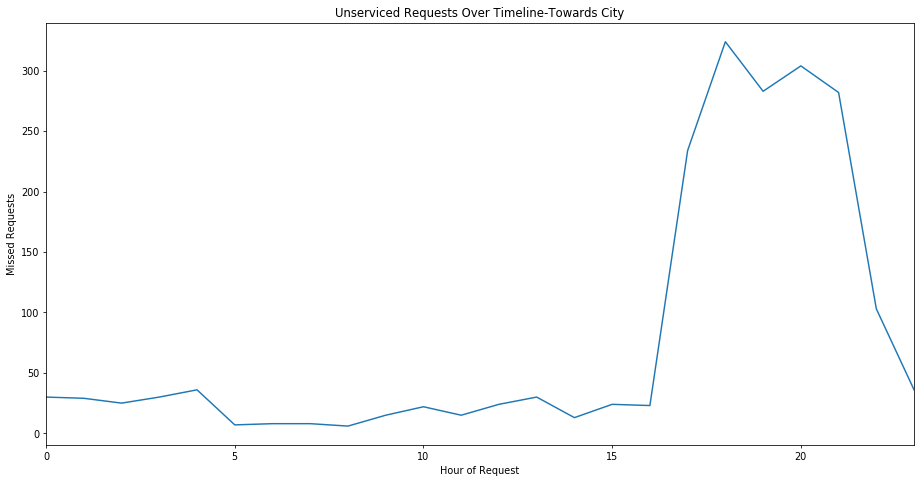

In [132]:
# time series plot based on above assumptions- rejects towards city

plt.figure(figsize=(16, 8),dpi=70)
sns.tsplot(uber_rejects_TowardCity)
plt.xlabel("Hour of Request")
plt.ylabel("Missed Requests")
plt.title('Unserviced Requests Over Timeline-Towards City')
plt.show()


In [96]:
#Further analysis based on ride type, slot and status against their count.
uber.groupby(['Ride Type','slot','Status',])['Request id'].count()

Ride Type        slot  Status           
Towards Airport  D     Cancelled              51
                       No Cars Available     195
                       Trip Completed        332
                 E     Cancelled              60
                       No Cars Available      71
                       Trip Completed        411
                 EM    Cancelled             376
                       No Cars Available     314
                       Trip Completed        297
                 M     Cancelled             560
                       No Cars Available     274
                       Trip Completed        349
                 N     Cancelled              19
                       No Cars Available      83
                       Trip Completed        115
Towards City     D     Cancelled              55
                       No Cars Available      74
                       Trip Completed        274
                 E     Cancelled             106
                       No Ca

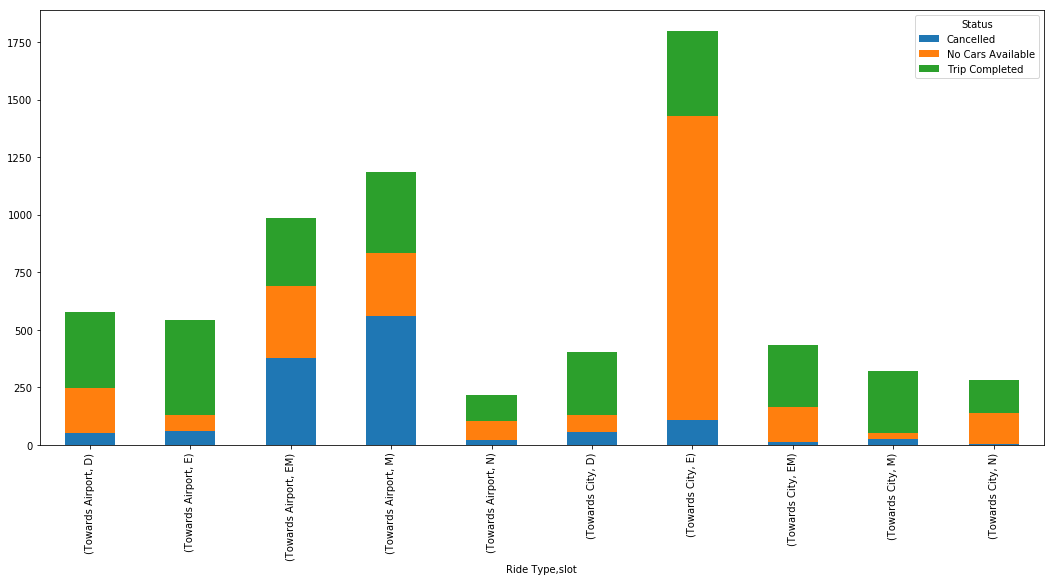

In [107]:
#Plotting above analysis in graph
fig, ax=plt.subplots(figsize=(18,8))
uber.groupby(['Ride Type','slot','Status',])['Request id'].count().unstack().plot(kind='bar', stacked=True,ax=ax)
plt.show()
# Outcomes -
# Clearly highlights the problem that customers are not getting the cars towards city in evening time.
# Also highlights Highest cancellation during morning time 